<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/xp_exercises_statisticsml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XP Exercises - Inferential statistics with regression

As stated in the instructions, please complete the code when you see a "##TODO"


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import ttest_ind


In [ ]:
## TODO : load the dataset in a dataframe called d1, that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv

In [4]:
df = pd.read_csv('air traffic.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [3]:
df.isnull().sum()

,0
Year,0
Month,0
Dom_Pax,0
Int_Pax,0
Pax,0
Dom_Flt,0
Int_Flt,0
Flt,0
Dom_RPM,0
Int_RPM,0


# Columns Description

* Dom_Pax : Domestic Air Travel Passengers
* Int_Pax : International Air Travel Passengers
* Pax : Total Air Travel Passengers
* Dom_Flt : Number of Flights (Domestic)
* Int_Flt : Number of Flights (International)
* Flt : Number of Flights (Total)
* Dom_RPM : Revenue Passenger-miles (Domestic)
* Int_RPM : Revenue Passenger-miles (International)


In [ ]:
## TODO: Check the summary of the DataFrame to see its structure and data types.

In [4]:
df.describe()

,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


In [5]:
df.dtypes

,0
Year,int64
Month,int64
Dom_Pax,object
Int_Pax,object
Pax,object
Dom_Flt,object
Int_Flt,object
Flt,object
Dom_RPM,object
Int_RPM,object


In [8]:
print(df.dtypes)
print(df['Dom_Pax'].head())
print(df['Dom_Flt'].head())

Year         int64
Month        int64
Dom_Pax    float64
Int_Pax     object
Pax         object
Dom_Flt    float64
Int_Flt     object
Flt         object
Dom_RPM     object
Int_RPM     object
RPM         object
Dom_ASM     object
Int_ASM     object
ASM         object
Dom_LF     float64
Int_LF     float64
LF         float64
dtype: object
0    43032450.0
1    41166780.0
2    49992700.0
3    47033260.0
4    49152352.0
Name: Dom_Pax, dtype: float64
0    785160.0
1    690351.0
2    797194.0
3    766260.0
4    789397.0
Name: Dom_Flt, dtype: float64


In [34]:
# Convert 'Dom_Pax' and 'Dom_Flt' to float64
df['Dom_Pax'] = df['Dom_Pax'].str.replace(',', '').astype(float)
df['Dom_Flt'] = df['Dom_Flt'].str.replace(',', '').astype(float)

# Verify conversion
print(df[['Dom_Pax', 'Dom_Flt']].dtypes)


Dom_Pax    float64
Dom_Flt    float64
dtype: object


In [51]:
# Convert the 'Flt' column to numeric (remove commas and convert to float)
# df["Flt"] = df["Flt"].str.replace(',', '').astype(float)
df["Int_Flt"] = df["Int_Flt"].str.replace(',', '').astype(float)



# Inferential statistics

We will perform the following :

1. Linear Regression

2. Hypothesis testing




# Linear and Multiple Regression

The best linear line describe the correlation between two variables.

We have two types:

1. linear Regression
2. Multiple Regression

The equation of regression

**w=a+(b*x)**

**w=predict variable**(The point of intersection of the x axis and the y axis)

**a=intercept**(The point of intersection of the regression and the y axis)

**b=slope**(The amount of increase in regression relative to the x-axis)

# Linear Regression

In [ ]:
## TODO: Explore the relationship between domestic passengers and domestic flights.

In [9]:
print(df.dtypes)  # Убедимся, что теперь float
correlation = df[['Dom_Pax', 'Dom_Flt']].corr()
print(correlation)



Year         int64
Month        int64
Dom_Pax    float64
Int_Pax     object
Pax         object
Dom_Flt    float64
Int_Flt     object
Flt         object
Dom_RPM     object
Int_RPM     object
RPM         object
Dom_ASM     object
Int_ASM     object
ASM         object
Dom_LF     float64
Int_LF     float64
LF         float64
dtype: object
          Dom_Pax   Dom_Flt
Dom_Pax  1.000000  0.536986
Dom_Flt  0.536986  1.000000


0.537 is a moderate positive correlation.
This means that more flights are usually seen among passengers, but the situation is not ideal.

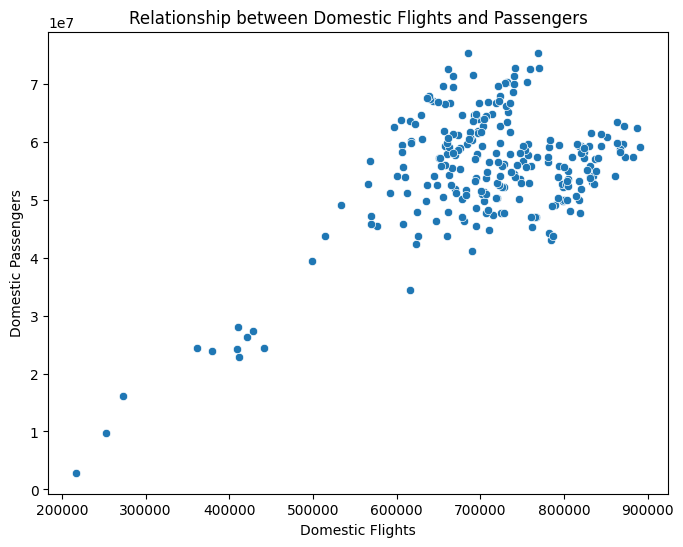

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Dom_Flt'], y=df['Dom_Pax'])
plt.xlabel('Domestic Flights')
plt.ylabel('Domestic Passengers')
plt.title('Relationship between Domestic Flights and Passengers')
plt.show()


The scatter plot shows a positive relationship between the number of flights and the number of passengers. It is obvious that as the number of flights increases, the number of passengers also increases.

In [ ]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.

In [11]:
# Define the independent variables (features) and dependent variable (target)
X = df[['Dom_Pax']]
y = df['Dom_Flt']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Dom_Flt   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     100.1
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           5.32e-20
Time:                        12:58:09   Log-Likelihood:                -3194.2
No. Observations:                 249   AIC:                             6392.
Df Residuals:                     247   BIC:                             6399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.028e+05   3.09e+04     13.025      0.0

In [ ]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.

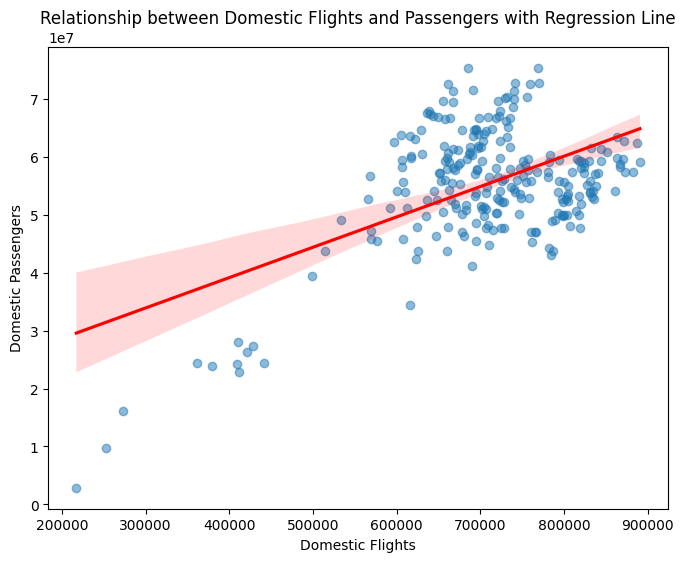

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Dom_Flt'], y=df['Dom_Pax'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Domestic Flights')
plt.ylabel('Domestic Passengers')
plt.title('Relationship between Domestic Flights and Passengers with Regression Line')
plt.show()

In general, the more domestic flights, the more passengers.
However, the relationship is not perfect: there are variations due to seasonality, route, economic factors and other variables.
The correlation coefficient (~0.54) shows a moderate relationship. If it were closer to 1, the trend would be clearer.

In [ ]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.

In [13]:
X = df['Dom_Flt']
y = df['Dom_Pax']

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# predict for 100
predicted_value = slope * 100 + intercept

# print result
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")
print(f"Predicted value for 100 domestic flights: {predicted_value}")


Slope: 52.369680671515425
Intercept: 18197400.870412588
P-value: 5.3156895585332156e-20
Standard Error: 5.234799222558312
Predicted value for 100 domestic flights: 18202637.83847974


a strong positive correlation between the number of flights and passengers,

Slope: Shows how much the number of passengers changes when the number of flights increases by 1.
Intercept: The value of passengers when the number of flights is zero (theoretically).
R2R2: How well the model explains the data (the closer to 1, the better).
P-value: Must be < 0.05 for the regression to be considered statistically significant.
Standard Error: An estimate of the accuracy of the slope coefficient.

# The coefficient of correlation

The relationship between the values on the x-axis and the y-axis determines whether linear regression can be used for prediction. If there is no relationship, linear regression is not suitable for making predictions.

The correlation coefficient (r) ranges from -1 to 1. A value of 0 indicates no relationship, while values close to 1 or -1 signify a strong positive or negative relationship, respectively, with a perfect correlation at either end.

In [ ]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.

# Linear Regression


In [14]:
## TODO: Calculate linear regression parameters
slope, intercept, r, p, std_err = linregress(X,y)
r2 =  r ** 2
## TODO:  Define the function for the linear model


## TODO:  Apply the model to the 'Month' data


## TODO:  Plot the scatter plot and the regression line

# Results
print("slope =", slope)
print("intercept =", intercept)
print("r² =", r2)
print("p =", p)
print("std_err =", std_err)


slope = 52.369680671515425
intercept = 18197400.870412588
r² = 0.2883544120989239
p = 5.3156895585332156e-20
std_err = 5.234799222558312


In [ ]:
## TODO: Print r2

In [15]:
print("r² =", r2)

r² = 0.2883544120989239


r² close to 1 → the model explains the data well. r² close to 0 → the model explains the data poorly.

This is a relatively low value, indicating a weak relationship between the variables.

**Now Let's using ScikitLearn (Linear regression) to predict the value of y by using values of x**


In [ ]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)

In [16]:
X = df['Dom_Flt'].values  # convert to mass NumPy

X = X.reshape(-1, 1)

y = df['Dom_Pax'].values

print(X.shape)

(249, 1)


In [ ]:
## TODO: Split the data into training and validation sets.

In [17]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  print(X_train.shape)
  print(X_test.shape)

(199, 1)
(50, 1)


In [ ]:
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.

In [18]:
# fit
model = LinearRegression()
model.fit(X, y)

#  make a prediction
y_pred = model.predict(X)

# evaluate
r2 = r2_score(y, y_pred)


print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R²: {r2}")


Slope: 52.369680671515425
Intercept: 18197400.870412588
R²: 0.28835441209892376


In [ ]:
## TODO: Print the prediction for the given input.

The Mean Squared Error (MSE) measures how well a regression line fits a set of data points by calculating the average of the squared differences between the observed values and the predicted values.

The formula for MSE is:

MSE=(1/n)*sum(yi-yhati)^2

yi=observed values

yhat=predict value

MSE quantifies the error between the observed and predicted values, with smaller values indicating better model accuracy.

In [ ]:
## TODO: Calculate the mean squared error (MSE) for the training set.

In [19]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 7206706.552851688
MSE: 77261480521383.78


MSE = 77,261,480,521,383 → The mean square error is very large, indicating significant outliers or large variance in the data.

What do you think ?

# Multiple Regression

Multiple regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables. This allows us to understand how multiple predictors influence a single outcome.

The general formula for multiple regression is:

y=β0+β1x1+β2x2+⋯+βpxp+ϵ


Where:

* y is the dependent (or response) variable,
* x1​,x2​,…,xp​ are the independent (predictor) variables,
* β0​ is the intercept,
* pβ1​,β2​,…,βp​ are the regression coefficients for each independent variable,
* ϵ is the error term.

the goal is to estimate the coefficients (β) that minimize the error between the predicted and actual values of the dependent variable.

In [ ]:
## TODO: Reshape the features mx and target variables my .

In [55]:

mx = df[["Int_Flt", "Dom_Flt"]].values # features
my = df["Year"].values      # target variable

# convert in matrix numpy
mx = np.array(mx)
my = np.array(my)



mx = np.array(mx)
my = np.array(my).reshape(-1, 1)

print(mx.shape, my.shape)

(249, 2) (249, 1)


In [ ]:
## TODO: Split the features and target variables into training and validation sets.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(mx, my, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((199, 2), (50, 2))

In [ ]:
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score

In [57]:
#train model
model = LinearRegression()
model.fit(X_train, y_train)

# calculate R^2
r2_train = model.score(X_train, y_train)
print(f"R^2 on training data: {r2_train:.4f}")

R^2 on training data: 0.7187


In [ ]:
## TODO: Print the target values

In [59]:
print(my[:10])


[[2003]
 [2003]
 [2003]
 [2003]
 [2003]
 [2003]
 [2003]
 [2003]
 [2003]
 [2003]]


In [ ]:
## TODO: Make a prediction using the multiple regression model.

In [60]:
# make predictions
predictions = model.predict(mx)


print(predictions[:10])


[[2005.5488583 ]
 [2009.69257896]
 [2005.15974729]
 [2005.94972629]
 [2004.53813212]
 [2004.86990319]
 [2004.17851358]
 [2004.481953  ]
 [2004.64434957]
 [2002.36956943]]


# Hypothesis testing

Hypothesis testing is a systematic procedure used to evaluate whether the results of a research study support a particular theory or assumption about a population. It helps determine if there is enough evidence to reject or fail to reject a hypothesis based on sample data.

**we have two types**

1. The null hypothesis H0, represents the idea that there is no effect, relationship, or difference in the population. It serves as the baseline assumption that any observed effect in the data is due to chance.

Example: "There is no significant difference in test scores between two groups."

2. The alternative hypothesis Ha suggests that there is an effect, relationship, or difference in the population. It is what researchers typically aim to support with their data.

Example: "There is a significant difference in test scores between two groups."

In hypothesis testing, we aim to gather enough evidence from the sample to either reject the null hypothesis (H0H0​) in favor of the alternative hypothesis (HaHa​), or fail to reject the null hypothesis, indicating that there isn't sufficient evidence for the alternative hypothesis.


# Null hypothesis

The null hypothesis (H0H0​) is a statement that there is no significant difference or effect in the population. It assumes that any observed differences in the sample are due to random chance.

In hypothesis testing, the decision to reject or fail to reject the null hypothesis is based on the p-value.

If :
* p ≤ 0.05: Reject H0H0​ (evidence supports HaHa​).
* p > 0.05: Fail to reject H0H0​ (no evidence to support HaHa​).

# Alternative hypothesis Ha

The alternative hypothesis (HaHa​) is a statement in statistical hypothesis testing that suggests there is a significant difference, effect, or relationship in the population, contrary to the null hypothesis (H0H0​).

In other words, HaHa​ proposes that the observed data is not due to random chance, and there is some true effect or difference in the population that can be detected.

For example:

- Null Hypothesis (H0​): There is no significant difference in test scores between two groups.
- Alternative Hypothesis (Ha​): There is a significant difference in test scores between the two groups.

The goal of hypothesis testing is to gather enough evidence to reject the null hypothesis in favor of the alternative hypothesis, suggesting that the observed effect or difference is statistically significant.

In [ ]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice

In [30]:
# Convert all object columns to numeric by removing commas
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Extract the two variables
dom_flt = df['Dom_Flt']
int_flt = df['Int_Flt']

# Perform an independent t-test
t_stat, p_value = ttest_ind(dom_flt, int_flt, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")  # Scientific notation for small p-values


T-statistic: 94.0303
P-value: 1.3783e-199


# One sample test

is used to compare the diffrence between sample and population mean

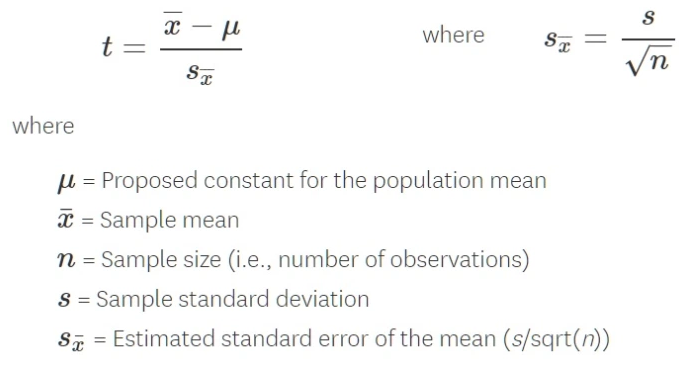

In [ ]:
## TODO: Calculate the population mean of the "Year" column.

In [9]:
popmean = df["Year"].mean()

In [6]:
# let's take sample from data

sample=np.random.choice(df["Year"],50)

In [7]:
sample

array([2011, 2003, 2016, 2017, 2014, 2022, 2007, 2011, 2011, 2005, 2003,
       2016, 2003, 2009, 2015, 2006, 2013, 2013, 2012, 2020, 2021, 2019,
       2023, 2012, 2005, 2022, 2020, 2015, 2017, 2007, 2009, 2007, 2013,
       2007, 2003, 2023, 2018, 2020, 2021, 2021, 2021, 2019, 2008, 2003,
       2021, 2017, 2021, 2020, 2019, 2016])

In [10]:
## Perform a one-sample t-test to compare the sample mean with the population mean.
ttest,p_value=ttest_1samp(sample,popmean)


In [11]:
ttest

1.126513294549434

In [12]:
sample.mean()

2013.9

In [ ]:
## TODO: Perform hypothesis testing based on the p-value.

In [14]:
# Hypothesis testing
if p_value < 0.05:
    print(f"P-value ({p_value:.4f}) < {0.05}, rejecting the null hypothesis (H0).")
    print("The sample mean is statistically significantly different from the population mean.")
else:
    print(f"P-value ({p_value:.4f}) >= {0.05}, failing to reject the null hypothesis (H0).")
    print("There is no statistically significant difference between the sample and population mean.")


P-value (0.2654) >= 0.05, failing to reject the null hypothesis (H0).
There is no statistically significant difference between the sample and population mean.


# Two sample test

it is a statistical test used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly employed when researchers want to assess whether the mean values of a particular variable differ between two distinct groups.

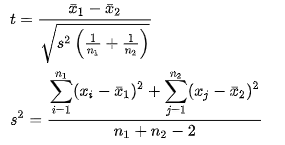

In [ ]:
## TODO: Randomly select a sample of 50 from the "Flt" column.

In [27]:
sample_a =np.random.choice(df["Flt"],50)

In [28]:
sample_a

array([789191., 764065., 851326., 672803., 739118., 899701., 655855.,
       809770., 459910., 449262., 928415., 713549., 768849., 745517.,
       772968., 771996., 858562., 819659., 854246., 737455., 427918.,
       914511., 964102., 768040., 862487., 870504., 742649., 856120.,
       745390., 459910., 788620., 845530., 541632., 800478., 767348.,
       862487., 862927., 716411., 679388., 665686., 784846., 706238.,
       875835., 734434., 869349., 723111., 787368., 222280., 682832.,
       739255.])

In [ ]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.

In [35]:
sample_b =np.random.choice(df["Dom_Pax"],50)

In [36]:
sample_b

array([ 2877290., 63979337., 57870281., 57143966., 59142493., 52639838.,
       66134540., 60546348., 61757222., 59779045., 72789897., 57206249.,
       49075979., 53902837., 60310295., 58303233., 59688267., 66663503.,
       59142493., 59261855., 52948582., 64624806., 59688267., 22921780.,
       50982170., 48584832., 59142493., 62752121., 53902837., 51111121.,
       42440614., 59724061., 49757124., 57403835., 55989104., 61622947.,
       53902837., 66643229., 47059495., 51076415., 59142493., 58619844.,
       67571574., 51111121., 63518318., 66961805., 45306597., 58646304.,
       62396446., 62770180.])

In [ ]:
## TODO: Perform an independent t-test between `sample_a` and `sample_b` to compare their means.

In [38]:
popmean_a = df["Flt"].mean()
print(popmean_a)
popmean_p = df["Dom_Pax"].mean()
print(popmean_p)

771486.8835341366
55209709.91164659


In [41]:
t_stat, p_value = ttest_ind(sample_a, sample_b, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -35.4002
P-value: 0.0000


We reject the null hypothesis (H₀) and confirm that the sample means of the statistical quantities are observed.

In [42]:
if p_value <=0.05:
    print("rejected null hypothesis",p_value)
else:
    print("accepted null hypothesis",p_value)

rejected null hypothesis 1.4279845915830303e-36


# Type| & Type ||

Reject the null hypothesis when it’s actually true (Type I error)

Reject the null hypothesis when it’s actually false (Correct)

Fail to reject the null hypothesis when it’s actually true (Correct)

Fail to reject the null hypothesis when it’s actually false (Type II error)

![](https://miro.medium.com/v2/resize:fit:828/format:webp/0*JM4fxEI__jX5f4Oy)